In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import pointbiserialr
from scipy.stats import spearmanr

import geopandas as gpd
from shapely.geometry import Point
import folium
from IPython.display import IFrame
import webbrowser

# Set options to show all columns
pd.set_option('display.max_columns', None)

# Upload csv file
data = r'C:\repos\immo-eliza-team6-analysis\data\clean\after_step_3b_outliers_cat.csv' # Fill your path to file
df = pd.read_csv(data, sep = ',')


In [13]:
# transform dtypes 'object' to 'category'
int_columns = df.select_dtypes(include=['object'])

for col in int_columns.columns:
    df[col] = df[col].astype('category')

df['Postal_code']= df['Postal_code'].astype('string')
df['post_1'] = df['Postal_code'].str[0]
df['post_2'] = df['Postal_code'].str[0:2]

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4516 entries, 0 to 4515
Data columns (total 32 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   id                         4516 non-null   int64   
 1   locality_name              4516 non-null   category
 2   Postal_code                4516 non-null   string  
 3   Price                      4516 non-null   int64   
 4   Subtype                    4516 non-null   category
 5   Number_of_bedrooms         4516 non-null   int64   
 6   Living_area                4516 non-null   int64   
 7   street                     4516 non-null   category
 8   number                     4501 non-null   category
 9   latitude                   4516 non-null   float64 
 10  longitude                  4516 non-null   float64 
 11  Open_fire                  4516 non-null   bool    
 12  Swimming_Pool              4516 non-null   bool    
 13  hasTerrace                 3034 n

In [14]:
df.describe(include='all')

,id,locality_name,Postal_code,Price,Subtype,Number_of_bedrooms,Living_area,street,number,latitude,longitude,Open_fire,Swimming_Pool,hasTerrace,terraceSurface,gardenSurface,Kitchen_type,Number_of_facades,State_of_building,Furnished,epc,landSurface,price_per_sqm,price_per_sqm_land,Province,Assigned_City,Has_Assigned_City,Kitchen_type_encoded,State_of_building_encoded,EPC_encoded,post_1,post_2
count,4.516000e+03,4516,4516,4516.000000,4516,4516.000000,4516.000000,4516,4501,4516.000000,4516.000000,4516,4516,3034,4516.000000,4516.000000,4516,4516.000000,4516,4516,4516,4516.000000,4516.000000,4516.000000,4516,1337,4516,4516.000000,4516.000000,4516.000000,4516,4516
unique,NaN,941,664,NaN,1,NaN,NaN,3349,554,NaN,NaN,2,2,1,NaN,NaN,4,NaN,5,2,6,NaN,NaN,NaN,11,10,2,NaN,NaN,NaN,9,77
top,NaN,Gent,9000,NaN,House,NaN,NaN,Stationsstraat,3,NaN,NaN,False,False,True,NaN,NaN,Installed,NaN,Good,False,C,NaN,NaN,NaN,East Flanders,Ghent,False,NaN,NaN,NaN,9,90
freq,NaN,159,124,NaN,4516,NaN,NaN,30,103,NaN,NaN,4335,4465,3034,NaN,NaN,3269,NaN,2200,4477,1009,NaN,NaN,NaN,1419,308,3179,NaN,NaN,NaN,1419,314
mean,1.911245e+07,NaN,NaN,349979.354074,NaN,3.242028,169.781222,NaN,NaN,50.894090,4.147918,NaN,NaN,NaN,24.280779,237.069309,NaN,2.817538,NaN,NaN,NaN,380.340345,2109.248294,1368.678380,NaN,NaN,NaN,1.338795,1.961249,2.301816,NaN,NaN
std,2.895771e+06,NaN,NaN,133890.172456,NaN,0.780502,47.909054,NaN,NaN,0.314435,0.755520,NaN,NaN,NaN,27.116148,248.400178,NaN,0.701786,NaN,NaN,NaN,236.099253,691.922545,1121.721336,NaN,NaN,NaN,0.741679,1.250844,1.650774,NaN,NaN
min,9.542242e+06,NaN,NaN,50000.000000,NaN,2.000000,44.000000,NaN,NaN,49.507785,2.585809,NaN,NaN,NaN,1.000000,1.000000,NaN,1.000000,NaN,NaN,NaN,30.000000,352.352941,90.702948,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN
25%,2.011806e+07,NaN,NaN,250000.000000,NaN,3.000000,135.000000,NaN,NaN,50.798610,3.611921,NaN,NaN,NaN,23.000000,220.000000,NaN,2.000000,NaN,NaN,NaN,190.000000,1607.430876,651.078174,NaN,NaN,NaN,1.000000,1.000000,1.000000,NaN,NaN
50%,2.019309e+07,NaN,NaN,339000.000000,NaN,3.000000,165.000000,NaN,NaN,50.941905,4.100740,NaN,NaN,NaN,23.000000,220.000000,NaN,3.000000,NaN,NaN,NaN,380.000000,2058.823529,994.567449,NaN,NaN,NaN,1.000000,2.000000,2.000000,NaN,NaN
75%,2.022806e+07,NaN,NaN,425000.000000,NaN,4.000000,198.000000,NaN,NaN,51.090725,4.529019,NaN,NaN,NaN,23.000000,220.000000,NaN,3.000000,NaN,NaN,NaN,450.000000,2570.798319,1669.868073,NaN,NaN,NaN,1.000000,2.000000,4.000000,NaN,NaN


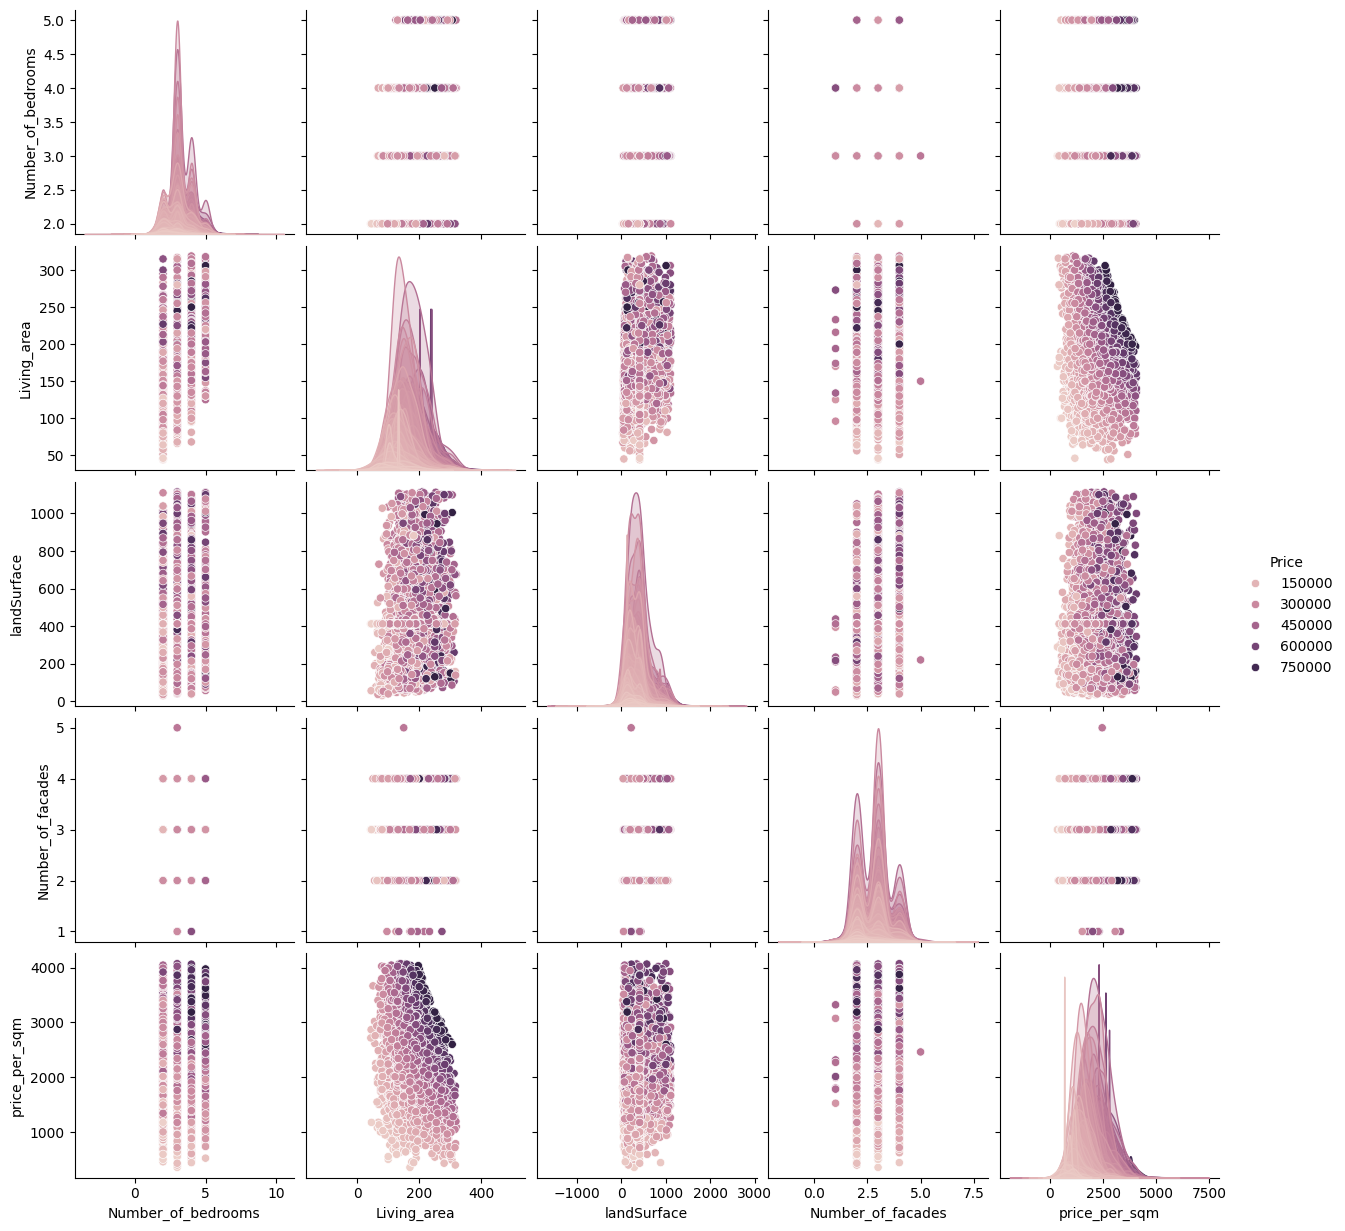

In [15]:
cols_to_plot = ['Number_of_bedrooms', 'Living_area', 'landSurface', 'Number_of_facades', 'price_per_sqm', 'Price']
sns.pairplot(df[cols_to_plot], hue='Price')
plt.show()



In [16]:
# Ensure 'Postal_code' is converted to integer for comparison
df['Postal_code'] = df['Postal_code'].astype(int)

# Apply the first condition: Flanders or Wallonie
df['region'] = df['Postal_code'].apply(
    lambda x: 'Flanders' if (1500 <= x < 4000) or (8000 <= x <= 9999) else 'Wallonie'
)

# Update 'region' to 'Brussels' for specific postal codes (compare integers)
df['region'] = df.apply(
    lambda row: 'Brussels' if 1000 <= row['Postal_code'] < 1300 else row['region'], axis=1
)
# Display the first few rows
df.head()

,id,locality_name,Postal_code,Price,Subtype,Number_of_bedrooms,Living_area,street,number,latitude,longitude,Open_fire,Swimming_Pool,hasTerrace,terraceSurface,gardenSurface,Kitchen_type,Number_of_facades,State_of_building,Furnished,epc,landSurface,price_per_sqm,price_per_sqm_land,Province,Assigned_City,Has_Assigned_City,Kitchen_type_encoded,State_of_building_encoded,EPC_encoded,post_1,post_2,region
0,20252354,Ronse,9600,319000,House,3,125,Rotterij,148,50.744176,3.625722,False,False,True,23,370,Installed,4,To renovate,False,F,767,2552.000000,415.906128,East Flanders,NaN,False,1,0,0,9,96,Flanders
1,20251003,Geraardsbergen,9500,299999,House,3,167,Pirrestraat,17,50.752121,3.925495,False,False,True,23,895,Installed,2,Good,False,D,1050,1796.401198,285.713333,East Flanders,NaN,False,1,2,2,9,95,Flanders
2,20252002,Mechelen,2800,275000,House,3,154,Caputsteenstraat,150,51.033269,4.491795,False,False,True,10,20,Semi equipped,2,To renovate,False,E,120,1785.714286,2291.666667,Antwerp,NaN,False,2,0,1,2,28,Flanders
3,20252352,Gooik,1755,295000,House,3,172,Strijlandstraat,45,50.791877,4.084293,False,False,True,23,300,Installed,3,To renovate,False,F,309,1715.116279,954.692557,Brabant_Wallon,NaN,False,1,0,0,1,17,Flanders
4,20251715,Dilbeek,1700,715000,House,3,280,Herdebeekstraat 94-94A,0,50.840610,4.228425,False,True,True,36,374,Installed,3,As new,False,C,374,2553.571429,1911.764706,Brabant_Wallon,NaN,False,1,4,3,1,17,Flanders


[(0.0, 900000.0)]

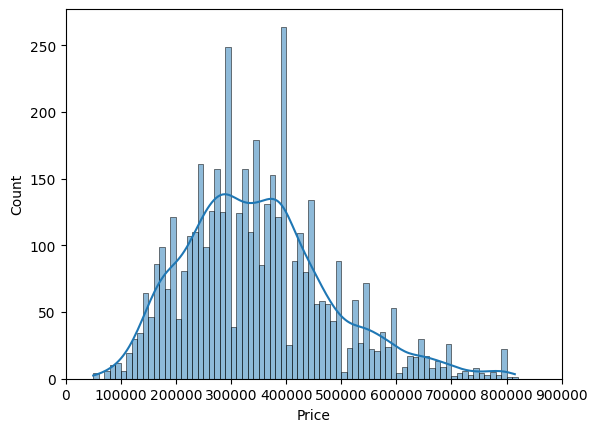

In [17]:
plotx= sns.histplot(df, x= 'Price', kde=True, binwidth=10000, binrange=(0, 900000)
                    )
plotx.set(xlim=(0, 900000))

[(0.0, 100000.0)]

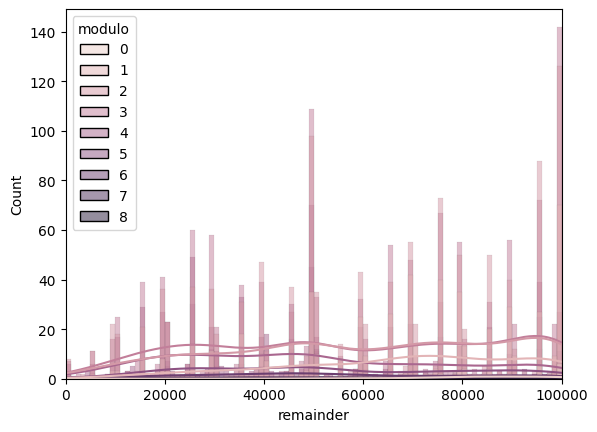

In [18]:
df['remainder'] = df['Price'] % 100000
df['modulo'] = df['Price'] // 100000

plotx= sns.histplot(df, x= 'remainder', kde=True, binwidth=1000, binrange=(0, 900000), hue = 'modulo'
                    )
plotx.set(xlim=(0, 100000))

In [19]:
print(df.columns)


Index(['id', 'locality_name', 'Postal_code', 'Price', 'Subtype',
       'Number_of_bedrooms', 'Living_area', 'street', 'number', 'latitude',
       'longitude', 'Open_fire', 'Swimming_Pool', 'hasTerrace',
       'terraceSurface', 'gardenSurface', 'Kitchen_type', 'Number_of_facades',
       'State_of_building', 'Furnished', 'epc', 'landSurface', 'price_per_sqm',
       'price_per_sqm_land', 'Province', 'Assigned_City', 'Has_Assigned_City',
       'Kitchen_type_encoded', 'State_of_building_encoded', 'EPC_encoded',
       'post_1', 'post_2', 'region', 'remainder', 'modulo'],
      dtype='object')


<Axes: xlabel='region', ylabel='Count'>

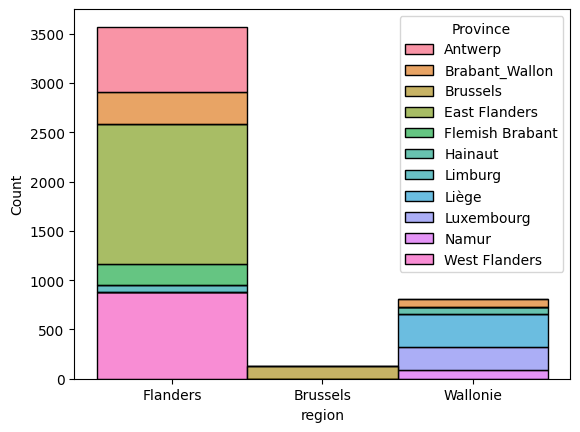

In [21]:
df_sorted = df.sort_values(by='post_1')

sns.histplot(df_sorted, x= 'region', hue = "Province", multiple="stack")



Text(0.5, 1.0, 'Price Distribution by kitchen type (normalized)')

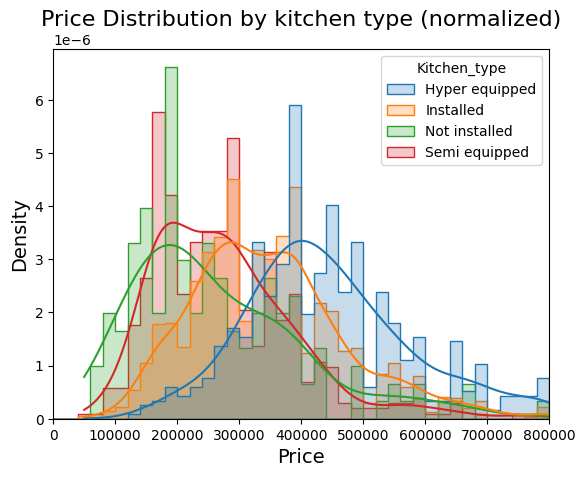

In [22]:
plotx= sns.histplot(df, x= 'Price', kde=True, hue = "Kitchen_type", binwidth=20000, binrange=(0, 1000000), stat='density', element = "step", common_norm=False)

plotx.set(xlim=(0, 800000))

# Set labels and title
plotx.set_xlabel('Price', fontsize=14)
plotx.set_ylabel('Density', fontsize=14)
plotx.set_title('Price Distribution by kitchen type (normalized)', fontsize=16)

In [23]:
grouped_counts = df.groupby('Kitchen_type').size()
print(grouped_counts)

Kitchen_type
Hyper equipped     585
Installed         3269
Not installed      151
Semi equipped      511
dtype: int64


C:\Users\petra\AppData\Local\Temp\ipykernel_24192\1834243117.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_counts = df.groupby('Kitchen_type').size()


Text(0.5, 1.0, 'Price Distribution by State of building (normalized)')

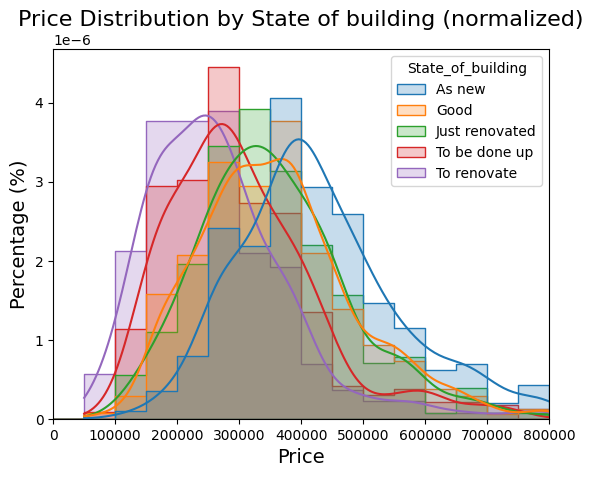

In [24]:
plotx= sns.histplot(df, x= 'Price', kde=True, hue = "State_of_building", binwidth=50000, binrange=(0, 1000000), stat='density', element = "step", common_norm=False)

plotx.set(xlim=(0, 800000))

# Set labels and title
plotx.set_xlabel('Price', fontsize=14)
plotx.set_ylabel('Percentage (%)', fontsize=14)
plotx.set_title('Price Distribution by State of building (normalized)', fontsize=16)

In [44]:
grouped_counts = df.groupby('State_of_building').size()
print(grouped_counts)

State_of_building
As new             804
Good              2200
Just renovated     255
To be done up      476
To renovate        781
dtype: int64


C:\Users\petra\AppData\Local\Temp\ipykernel_24192\695626291.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_counts = df.groupby('State_of_building').size()


In [25]:
print(df.columns)

Index(['id', 'locality_name', 'Postal_code', 'Price', 'Subtype',
       'Number_of_bedrooms', 'Living_area', 'street', 'number', 'latitude',
       'longitude', 'Open_fire', 'Swimming_Pool', 'hasTerrace',
       'terraceSurface', 'gardenSurface', 'Kitchen_type', 'Number_of_facades',
       'State_of_building', 'Furnished', 'epc', 'landSurface', 'price_per_sqm',
       'price_per_sqm_land', 'Province', 'Assigned_City', 'Has_Assigned_City',
       'Kitchen_type_encoded', 'State_of_building_encoded', 'EPC_encoded',
       'post_1', 'post_2', 'region', 'remainder', 'modulo'],
      dtype='object')


Text(0.5, 1.0, 'Price Distribution by EPC (normalized)')

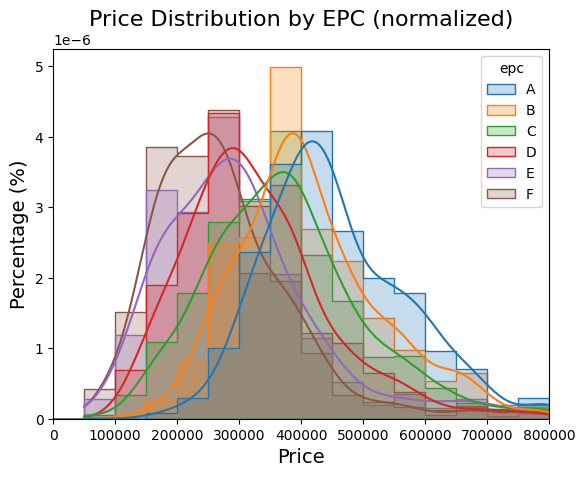

In [43]:
plotx= sns.histplot(df, x= 'Price', kde=True, hue = "epc", binwidth=50000, binrange=(0, 1000000), stat='density', element = "step", common_norm=False)

plotx.set(xlim=(0, 800000))

# Set labels and title
plotx.set_xlabel('Price', fontsize=14)
plotx.set_ylabel('Percentage (%)', fontsize=14)
plotx.set_title('Price Distribution by EPC (normalized)', fontsize=16)

In [27]:
grouped_counts = df.groupby('epc').size()
print(grouped_counts)

epc
A     481
B     713
C    1009
D     803
E     505
F    1005
dtype: int64


C:\Users\petra\AppData\Local\Temp\ipykernel_24192\744932791.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_counts = df.groupby('epc').size()


Text(0.5, 1.0, 'Price Distribution by region (normalized)')

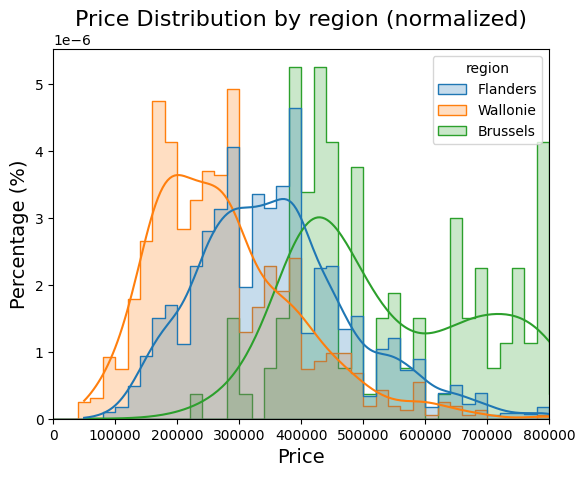

In [28]:
plotx= sns.histplot(df, x= 'Price', kde=True, hue = "region", binwidth=20000, binrange=(0, 1000000), stat='density', element = "step", common_norm=False)

plotx.set(xlim=(0, 800000))

# Set labels and title
plotx.set_xlabel('Price', fontsize=14)
plotx.set_ylabel('Percentage (%)', fontsize=14)
plotx.set_title('Price Distribution by region (normalized)', fontsize=16)

Has_Assigned_City
False    3179
True     1337
Name: count, dtype: int64


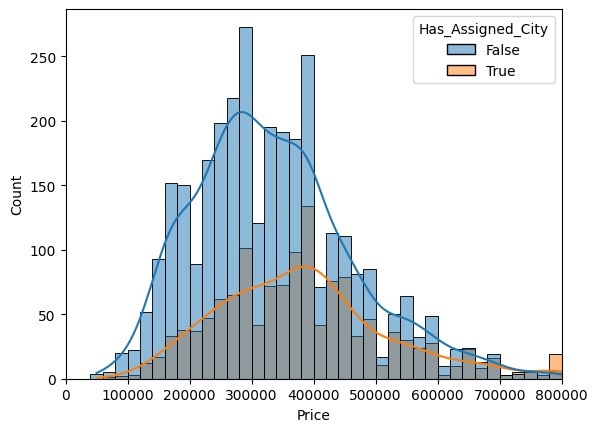

In [29]:
df['Has_Assigned_City'] = df['Has_Assigned_City']
plotx= sns.histplot(df, x= 'Price', kde=True, hue = "Has_Assigned_City", binwidth=20000, binrange=(0, 1000000), alpha=0.5)
plotx.set(xlim=(0, 800000))

print(df['Has_Assigned_City'].value_counts())


In [47]:
grouped_counts = df.groupby('region').size()
print(grouped_counts)

region
Brussels     133
Flanders    3572
Wallonie     811
dtype: int64


[(0.0, 800000.0)]

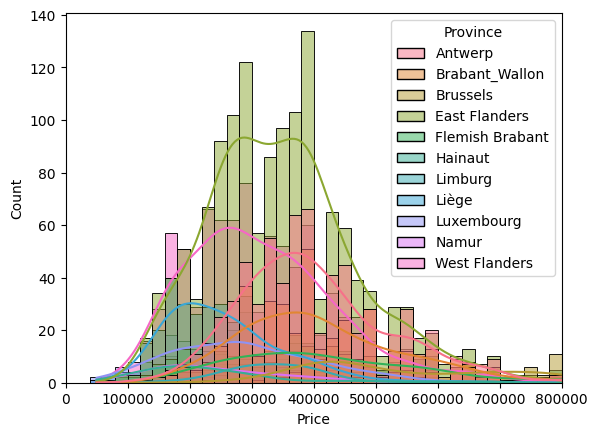

In [30]:
#flanders_df = df[df['region'] == "Flanders"]

plotx= sns.histplot(df, x= 'Price', kde=True, hue = "Province", binwidth=20000, binrange=(0, 1000000), alpha=0.5)
plotx.set(xlim=(0, 800000))



[(0.0, 800000.0)]

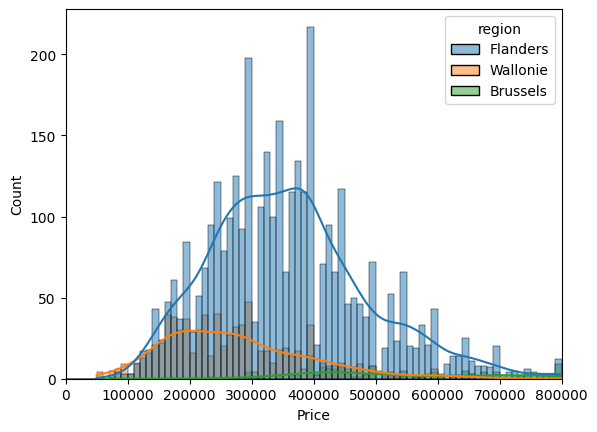

In [45]:
plotx= sns.histplot(df, x= 'Price', kde=True, hue = "region", binwidth=10000, binrange=(0, 1000000))
plotx.set(xlim=(0, 800000))

In [32]:

# Group by region and postal code, then calculate the average price
avg_price_per_postal_code = df.groupby(['region', 'Postal_code'])['Price'].mean().reset_index()

# Find the postal code with the highest average price per region
max_avg_price_per_region = avg_price_per_postal_code.loc[
    avg_price_per_postal_code.groupby('region')['Price'].idxmax()
]

# Display the result
print(max_avg_price_per_region)



       region  Postal_code     Price
4    Brussels         1060  695000.0
166  Flanders         3053  716000.0
421  Wallonie         1325  790000.0


In [33]:
# Step 1: Filter postal codes with at least 5 records
postal_code_counts = avg_price_per_postal_code['Postal_code'].value_counts()
valid_postal_codes = postal_code_counts[postal_code_counts >= 5].index

filtered_data = avg_price_per_postal_code[avg_price_per_postal_code['Postal_code'].isin(valid_postal_codes)]

# Step 2: Get max avg price per region
max_avg_price_per_region = filtered_data.loc[
    filtered_data.groupby('region')['Price'].idxmax()
]

print(max_avg_price_per_region)

Empty DataFrame
Columns: [region, Postal_code, Price]
Index: []


In [34]:
# Group by region and postal code, then calculate the median price
median_price_per_postal_code = df.groupby(['region', 'Postal_code'])['Price'].median().reset_index()

# Find the postal code with the highest median price per region
max_median_price_per_region = median_price_per_postal_code.loc[
    median_price_per_postal_code.groupby('region')['Price'].idxmax()
]

# Display the result
print(max_median_price_per_region)

       region  Postal_code     Price
13   Brussels         1150  725000.0
166  Flanders         3053  716000.0
421  Wallonie         1325  790000.0


In [35]:
# Group by region and postal code, then calculate the average price per sqm
avg_price_per_sqm_per_postal_code = df.groupby(['region', 'Postal_code'])['price_per_sqm'].mean().reset_index()

# Find the postal code with the highest average price per region
max_avg_price_per_sqm_per_region = avg_price_per_sqm_per_postal_code.loc[
    avg_price_per_sqm_per_postal_code.groupby('region')['price_per_sqm'].idxmax()
]

# Display the result
print(max_avg_price_per_sqm_per_region)

       region  Postal_code  price_per_sqm
13   Brussels         1150    3454.437528
174  Flanders         3111    3613.861386
490  Wallonie         4557    3839.779006


In [36]:
# Group by region and calculate the average house price
avg_price_per_region = df.groupby('region')['Price'].mean().reset_index()

# Optional: Format the price values for readability
avg_price_per_region['Price'] = avg_price_per_region['Price'].map('{:,.2f}'.format)

# Display the result
print(avg_price_per_region)

## 


     region       Price
0  Brussels  537,161.65
1  Flanders  359,742.88
2  Wallonie  276,279.53


https://postcode.nationaal.be/

https://www.notaris.be/vastgoedprijzen

tgoedprijzen

In [37]:
# Group by region and calculate the average house price
avg_price_per_sqm_per_region = df.groupby('region')['price_per_sqm'].mean().reset_index()

# Optional: Format the price values for readability
avg_price_per_sqm_per_region['price_per_sqm'] = avg_price_per_sqm_per_region['price_per_sqm'].map('{:,.2f}'.format)

# Display the result
print(avg_price_per_sqm_per_region)

     region price_per_sqm
0  Brussels      2,824.49
1  Flanders      2,145.39
2  Wallonie      1,832.77


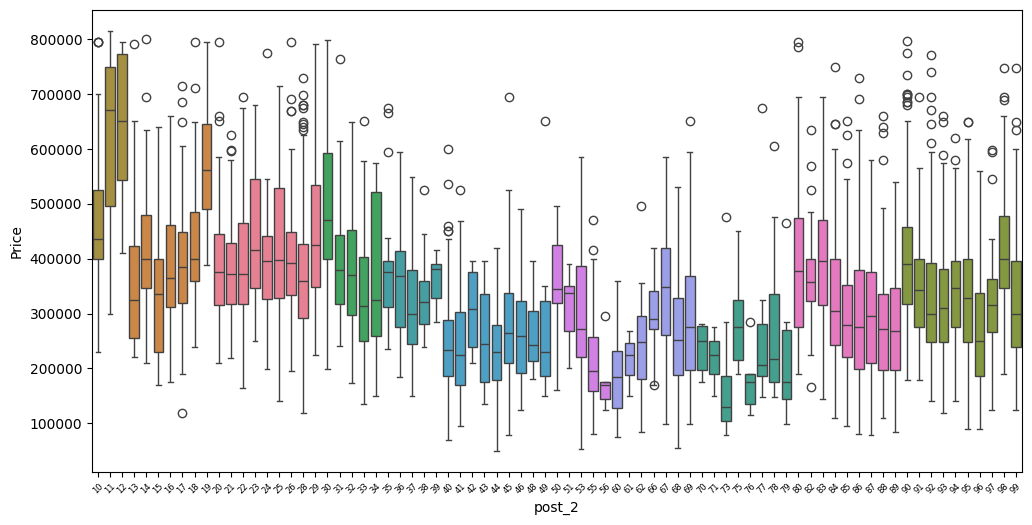

In [38]:
sorted_df = df.sort_values(by='post_2')
plt.figure(figsize=(12, 6))
plot = sns.boxplot(x='post_2', y='Price', data=sorted_df,  hue = 'Province',legend = False)
plt.xticks(rotation=45, fontsize=6)
plt.show()


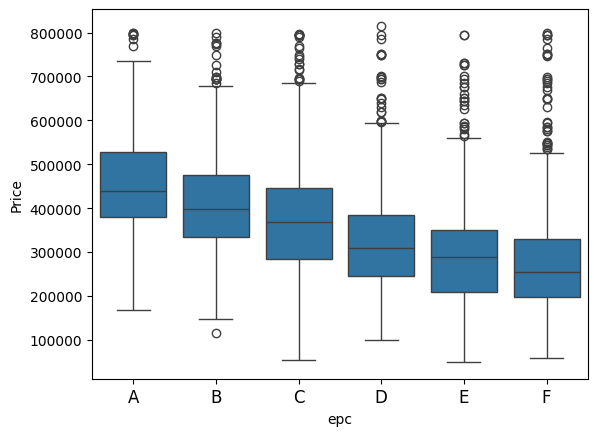

In [42]:
sorted_df2 = df.sort_values(by='epc')

plot = sns.boxplot(x='epc', y='Price', data=sorted_df2,  legend = False)
plt.xticks(fontsize=12)
plt.show()

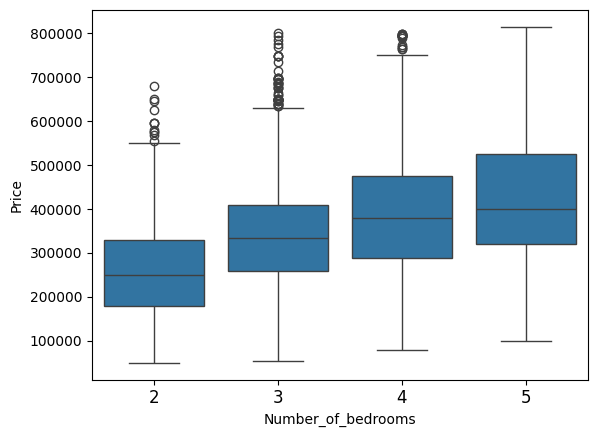

In [51]:
sorted_df3 = df.sort_values(by='Number_of_bedrooms')

plot = sns.boxplot(x='Number_of_bedrooms', y='Price', data=sorted_df3,  legend = False)
plt.xticks(fontsize=12)
plt.show()

In [52]:
grouped_counts = df.groupby('Number_of_bedrooms').size()
print(grouped_counts)

Number_of_bedrooms
2     673
3    2365
4    1190
5     288
dtype: int64


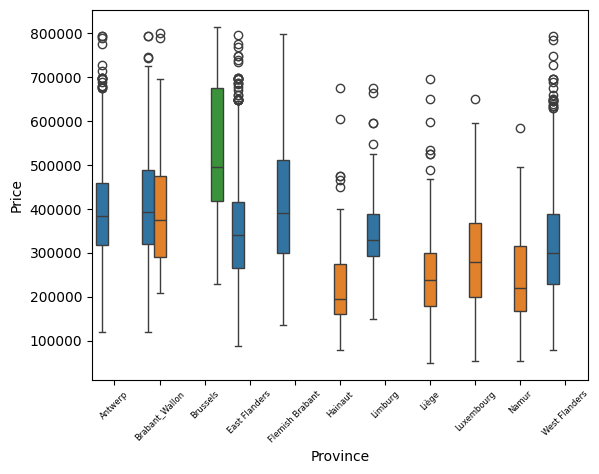

In [58]:
sorted4_df = df.sort_values(by='Province')

plot = sns.boxplot(x='Province', y='Price', data=sorted4_df,legend = False, hue = 'region')
plt.xticks(rotation=45, fontsize=6)
plt.show()